In [1]:
#Using Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

# Import the libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
# Import the dataset
data = pd.read_csv('hr_employee_churn_data.csv')

In [3]:
# Display the rows 
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
# Get Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [5]:
# Get the number of rows and columns
data.shape

(14999, 10)

In [6]:
# Statistical Summary
data.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Check for missing values
data.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [8]:
# Get the Unique Values
data['Work_accident'].unique()

array([0, 1])

In [9]:
data['promotion_last_5years'].unique()

array([0, 1])

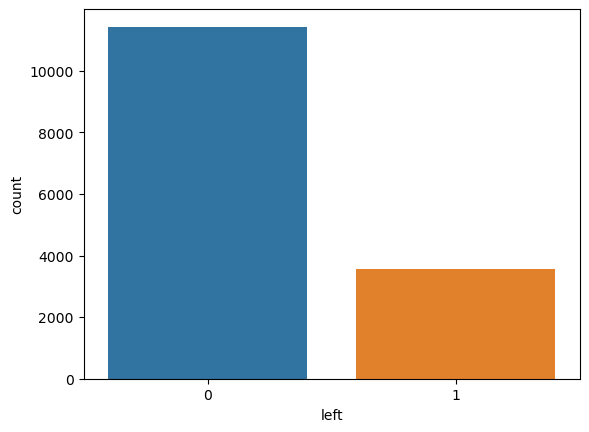

In [10]:
#Check total Employee range based on target variable left
sns.countplot(data, x='left')
plt.show()


<Axes: xlabel='salary', ylabel='count'>

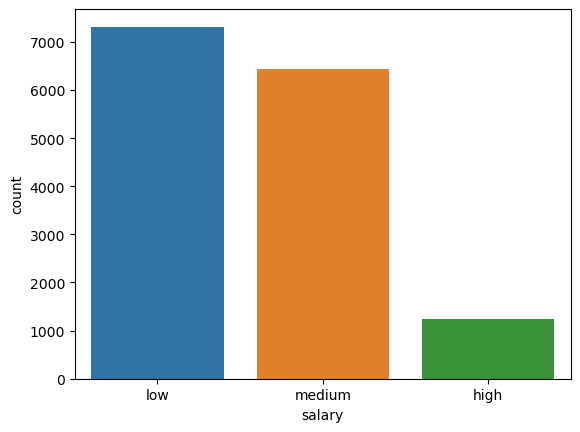

In [11]:
# Check the total number of Employees on the basis of the salary
sns.countplot(data, x='salary')

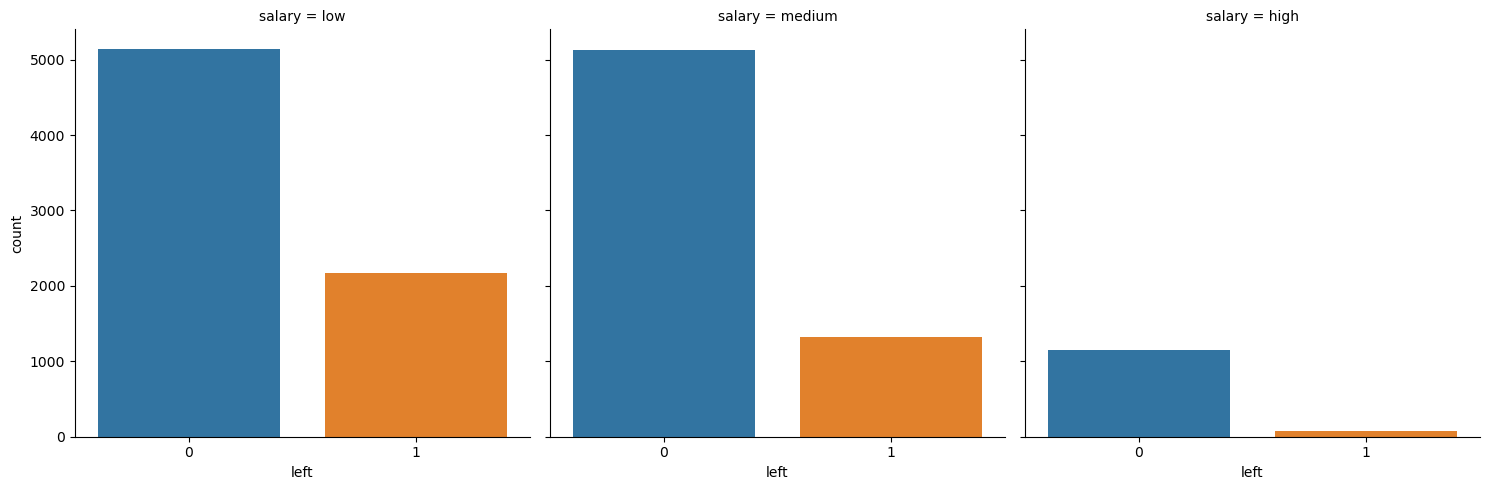

In [12]:
# Plot the different as per the lefy VS salary
sns.catplot(x='left', col='salary', kind='count', data=data)

<Axes: xlabel='promotion_last_5years', ylabel='count'>

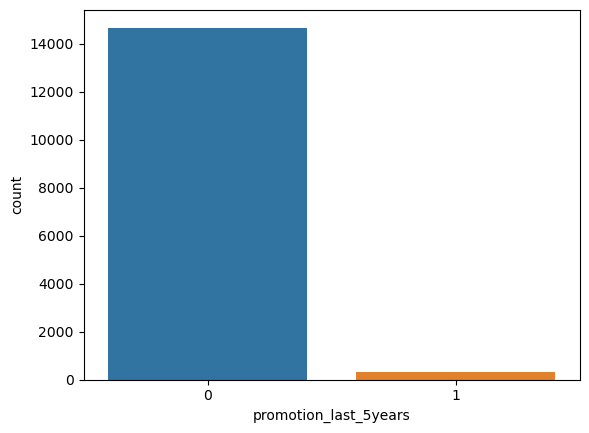

In [13]:
# FFeature Promotion in last 5 years
sns.countplot(data, x='promotion_last_5years')
#Takeaway: Most of the employees have not been promoted in the last 5 years.


<Figure size 1000x600 with 0 Axes>

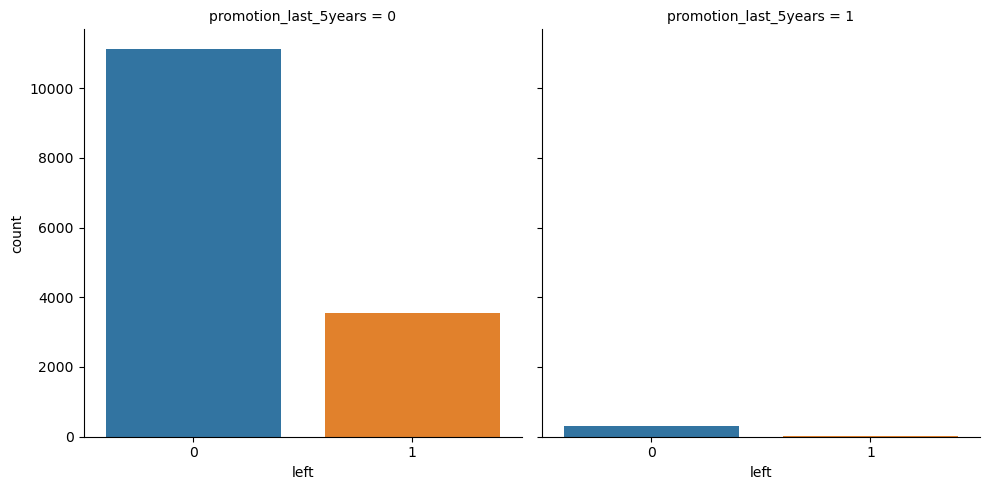

In [14]:
# Left Feature VS Promotion in last 5 years
plt.figure(figsize=(10,6))
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=data)
#Takeaway: Employees who have been promoted in the last 5 years have not left the company.

<Axes: xlabel='Work_accident', ylabel='count'>

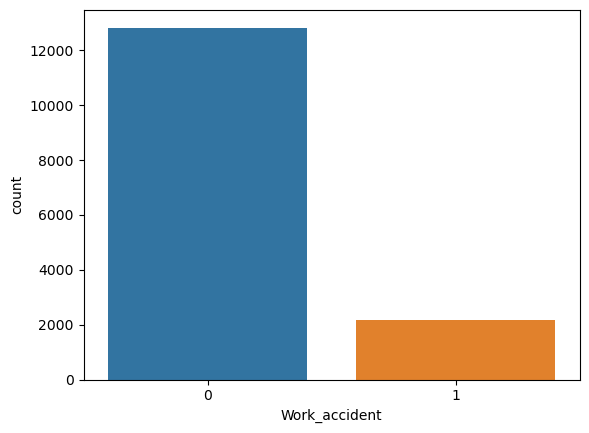

In [15]:
# Plot the graph on the work Accident
sns.countplot(data, x='Work_accident')
#Takeaway: Has very less people have faced work accidents.

<Figure size 1000x600 with 0 Axes>

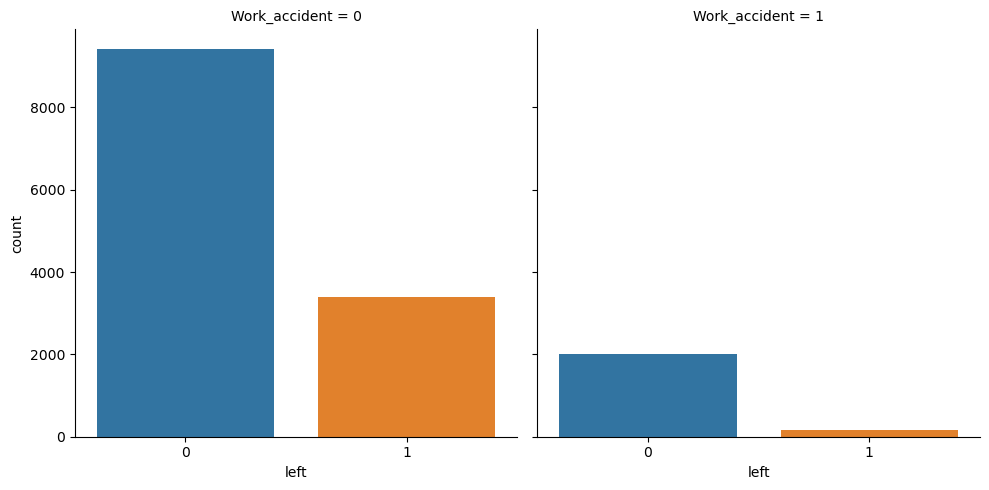

In [16]:
# Left Feature VS Work Accident
plt.figure(figsize=(10,6))
sns.catplot(x='left', col='Work_accident', kind='count', data=data)
#Takeaway: Employees who have faced work accidents have left the company more as compared to those who have not faced work accidents.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

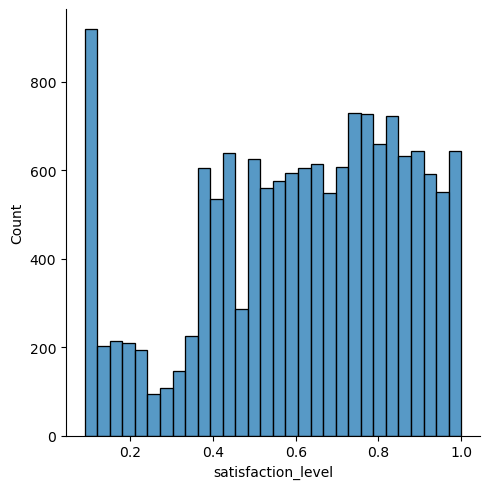

In [17]:
# Plot the satisfaction level of the employees
plt.figure(figsize=(10,6))
sns.displot(data['satisfaction_level'])
#Takeaway: Most of the employees have a satisfaction level between 0.5 and 1.0.

<Axes: xlabel='left', ylabel='satisfaction_level'>

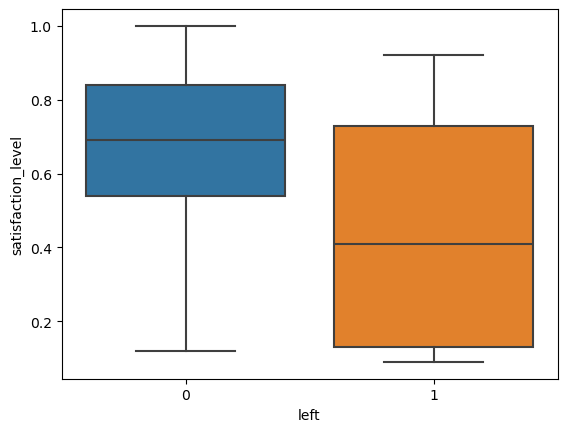

In [18]:
# Boxplot to show distributions with respect to satisfaction level
sns.boxplot(x='left', y='satisfaction_level', data=data)
#Takeaway: Employees who have left the company have a lower satisfaction level as compared to those who have not left the company.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

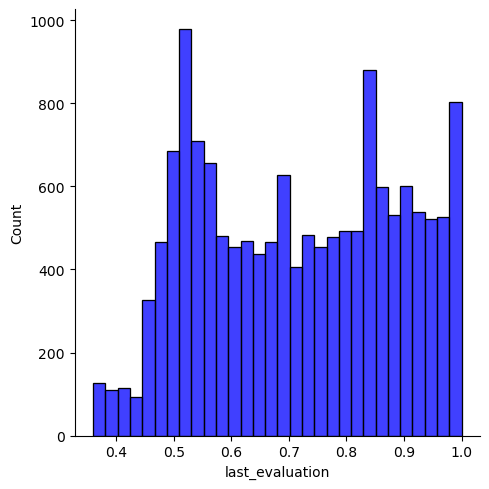

In [19]:
# Plot the last evaluation of the employees
plt.figure(figsize=(10,6))
sns.displot(data['last_evaluation'], bins=30, color='blue')
#Takeaway: Most of the employees have a last evaluation score between 0.6 and 0.8.



<Axes: xlabel='left', ylabel='last_evaluation'>

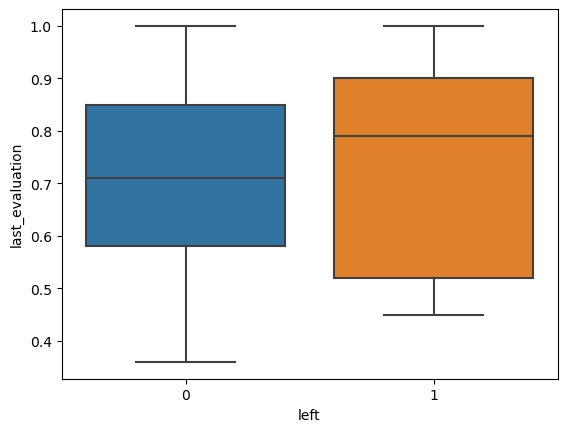

In [20]:
# Boxplot to show distributions with respect to last evaluation
sns.boxplot(x='left', y='last_evaluation', data=data)
#Takeaway: Employees who have left the company have a higher last evaluation score as compared to those who have not left the company.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


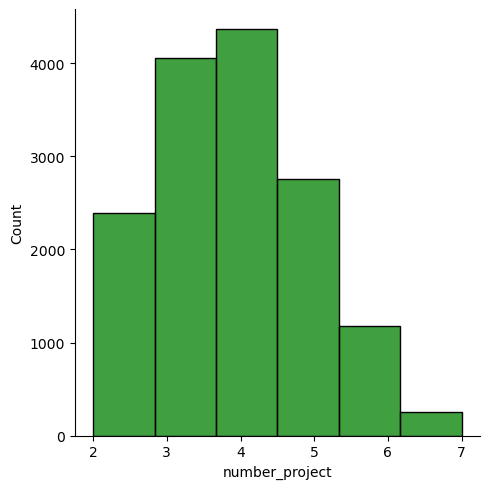

In [21]:
# Plot on the number of projects
sns.displot(data['number_project'], bins=6, color='green')
#Takeaway: Most of the employees have worked on 3 to 5 projects.

<Figure size 1000x600 with 0 Axes>

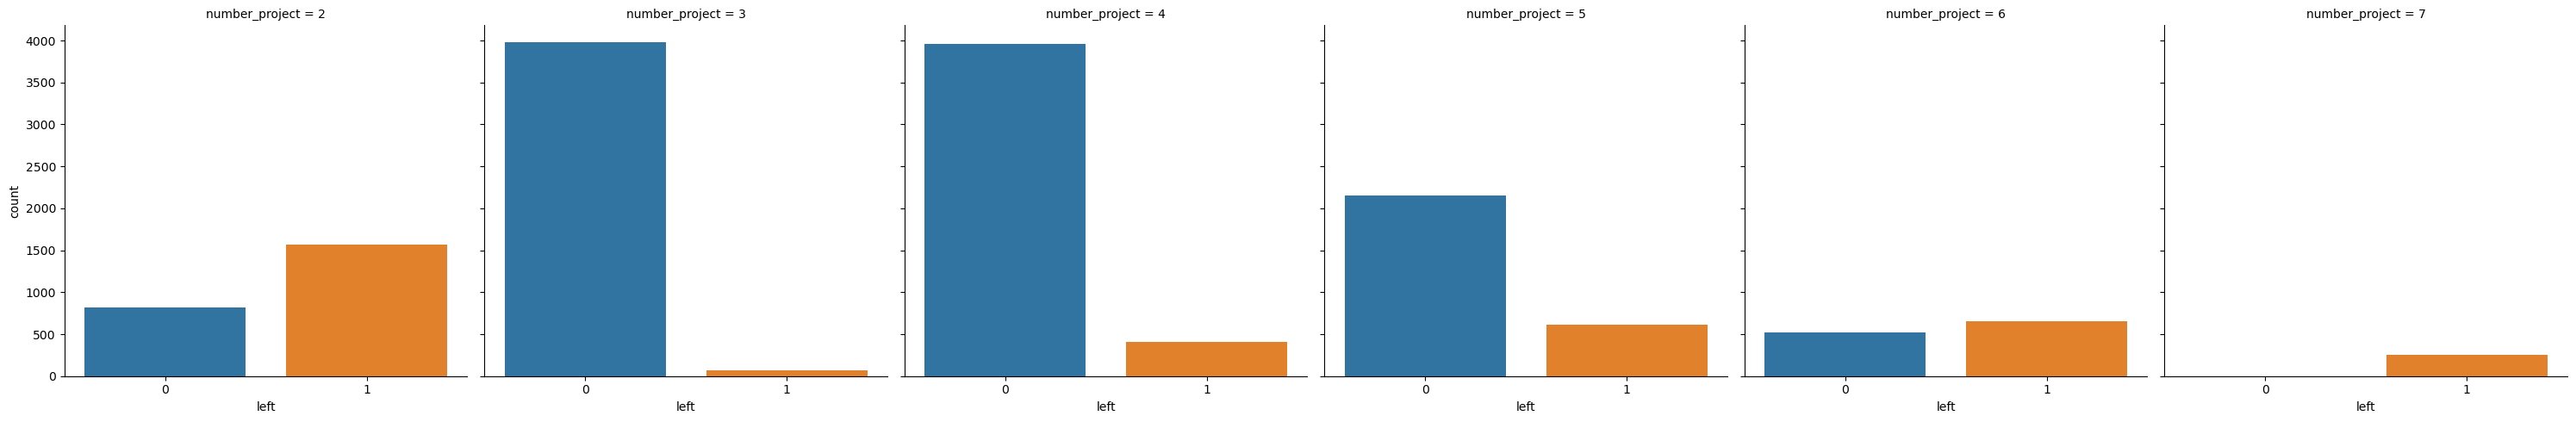

In [22]:
#Left Feature VS Number of Projects
plt.figure(figsize=(10,6))
sns.catplot(x='left', col='number_project', kind='count', data=data)
#Takeaway: Employees who have worked on 3 to 5 projects have not left the company.

/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_9839/2718803650.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_montly_hours'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='average_montly_hours', ylabel='Density'>

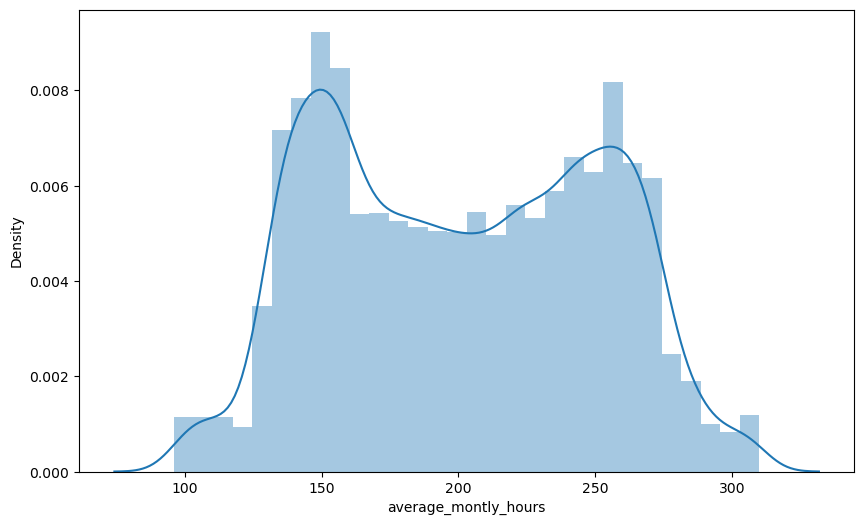

In [23]:
# Plot the average monthly hours of the employees
plt.figure(figsize=(10,6))
sns.distplot(data['average_montly_hours'])

<Axes: xlabel='left', ylabel='average_montly_hours'>

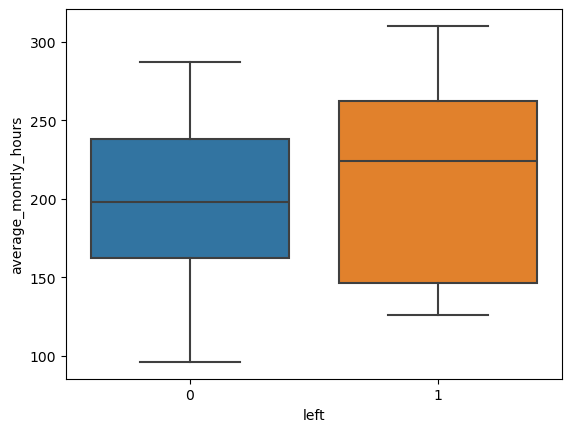

In [24]:
# Boxplot to show distributions with respect to average monthly hours
sns.boxplot(x='left', y='average_montly_hours', data=data)
#Takeaway: Employees who have left the company have worked more monthly hours as compared to those who have not left the company.       

<Axes: xlabel='time_spend_company', ylabel='count'>

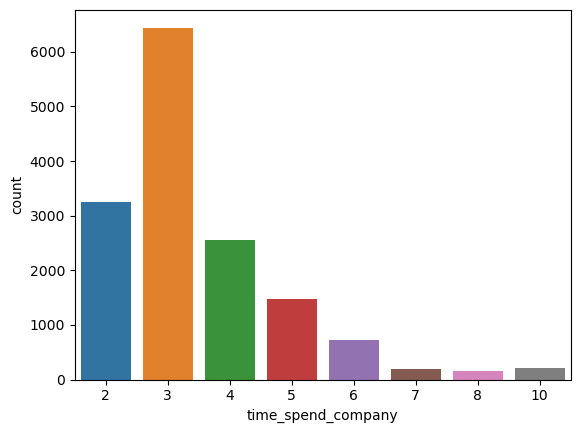

In [25]:
# Plot the time spent in the company
sns.countplot(x = 'time_spend_company', data = data)
#Takeaway: Most of the employees have spent 2 to 4 years in the company.


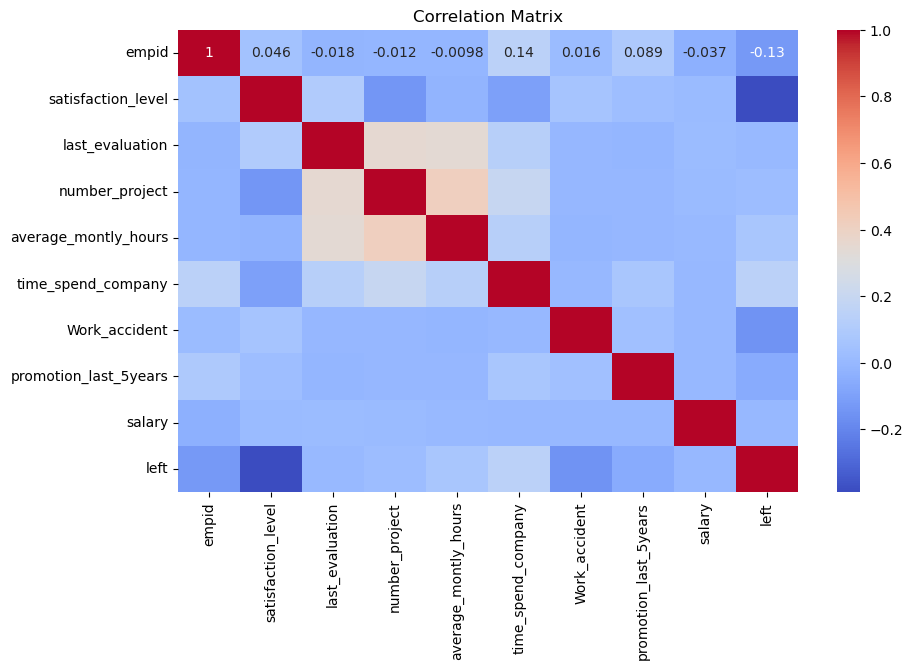

In [26]:
#Conver Non_Numeric Columns to Numeric Columns
labelencoder = LabelEncoder()
data['salary'] = labelencoder.fit_transform(data['salary'])
#Check for correlation
correlation = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#Takeaway: The target variable 'left' has a high negative correlation with 'satisfaction_level' and 'time_spend_company' and a high positive correlation with 'number_project' and 'average_montly_hours'.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1000x600 with 0 Axes>

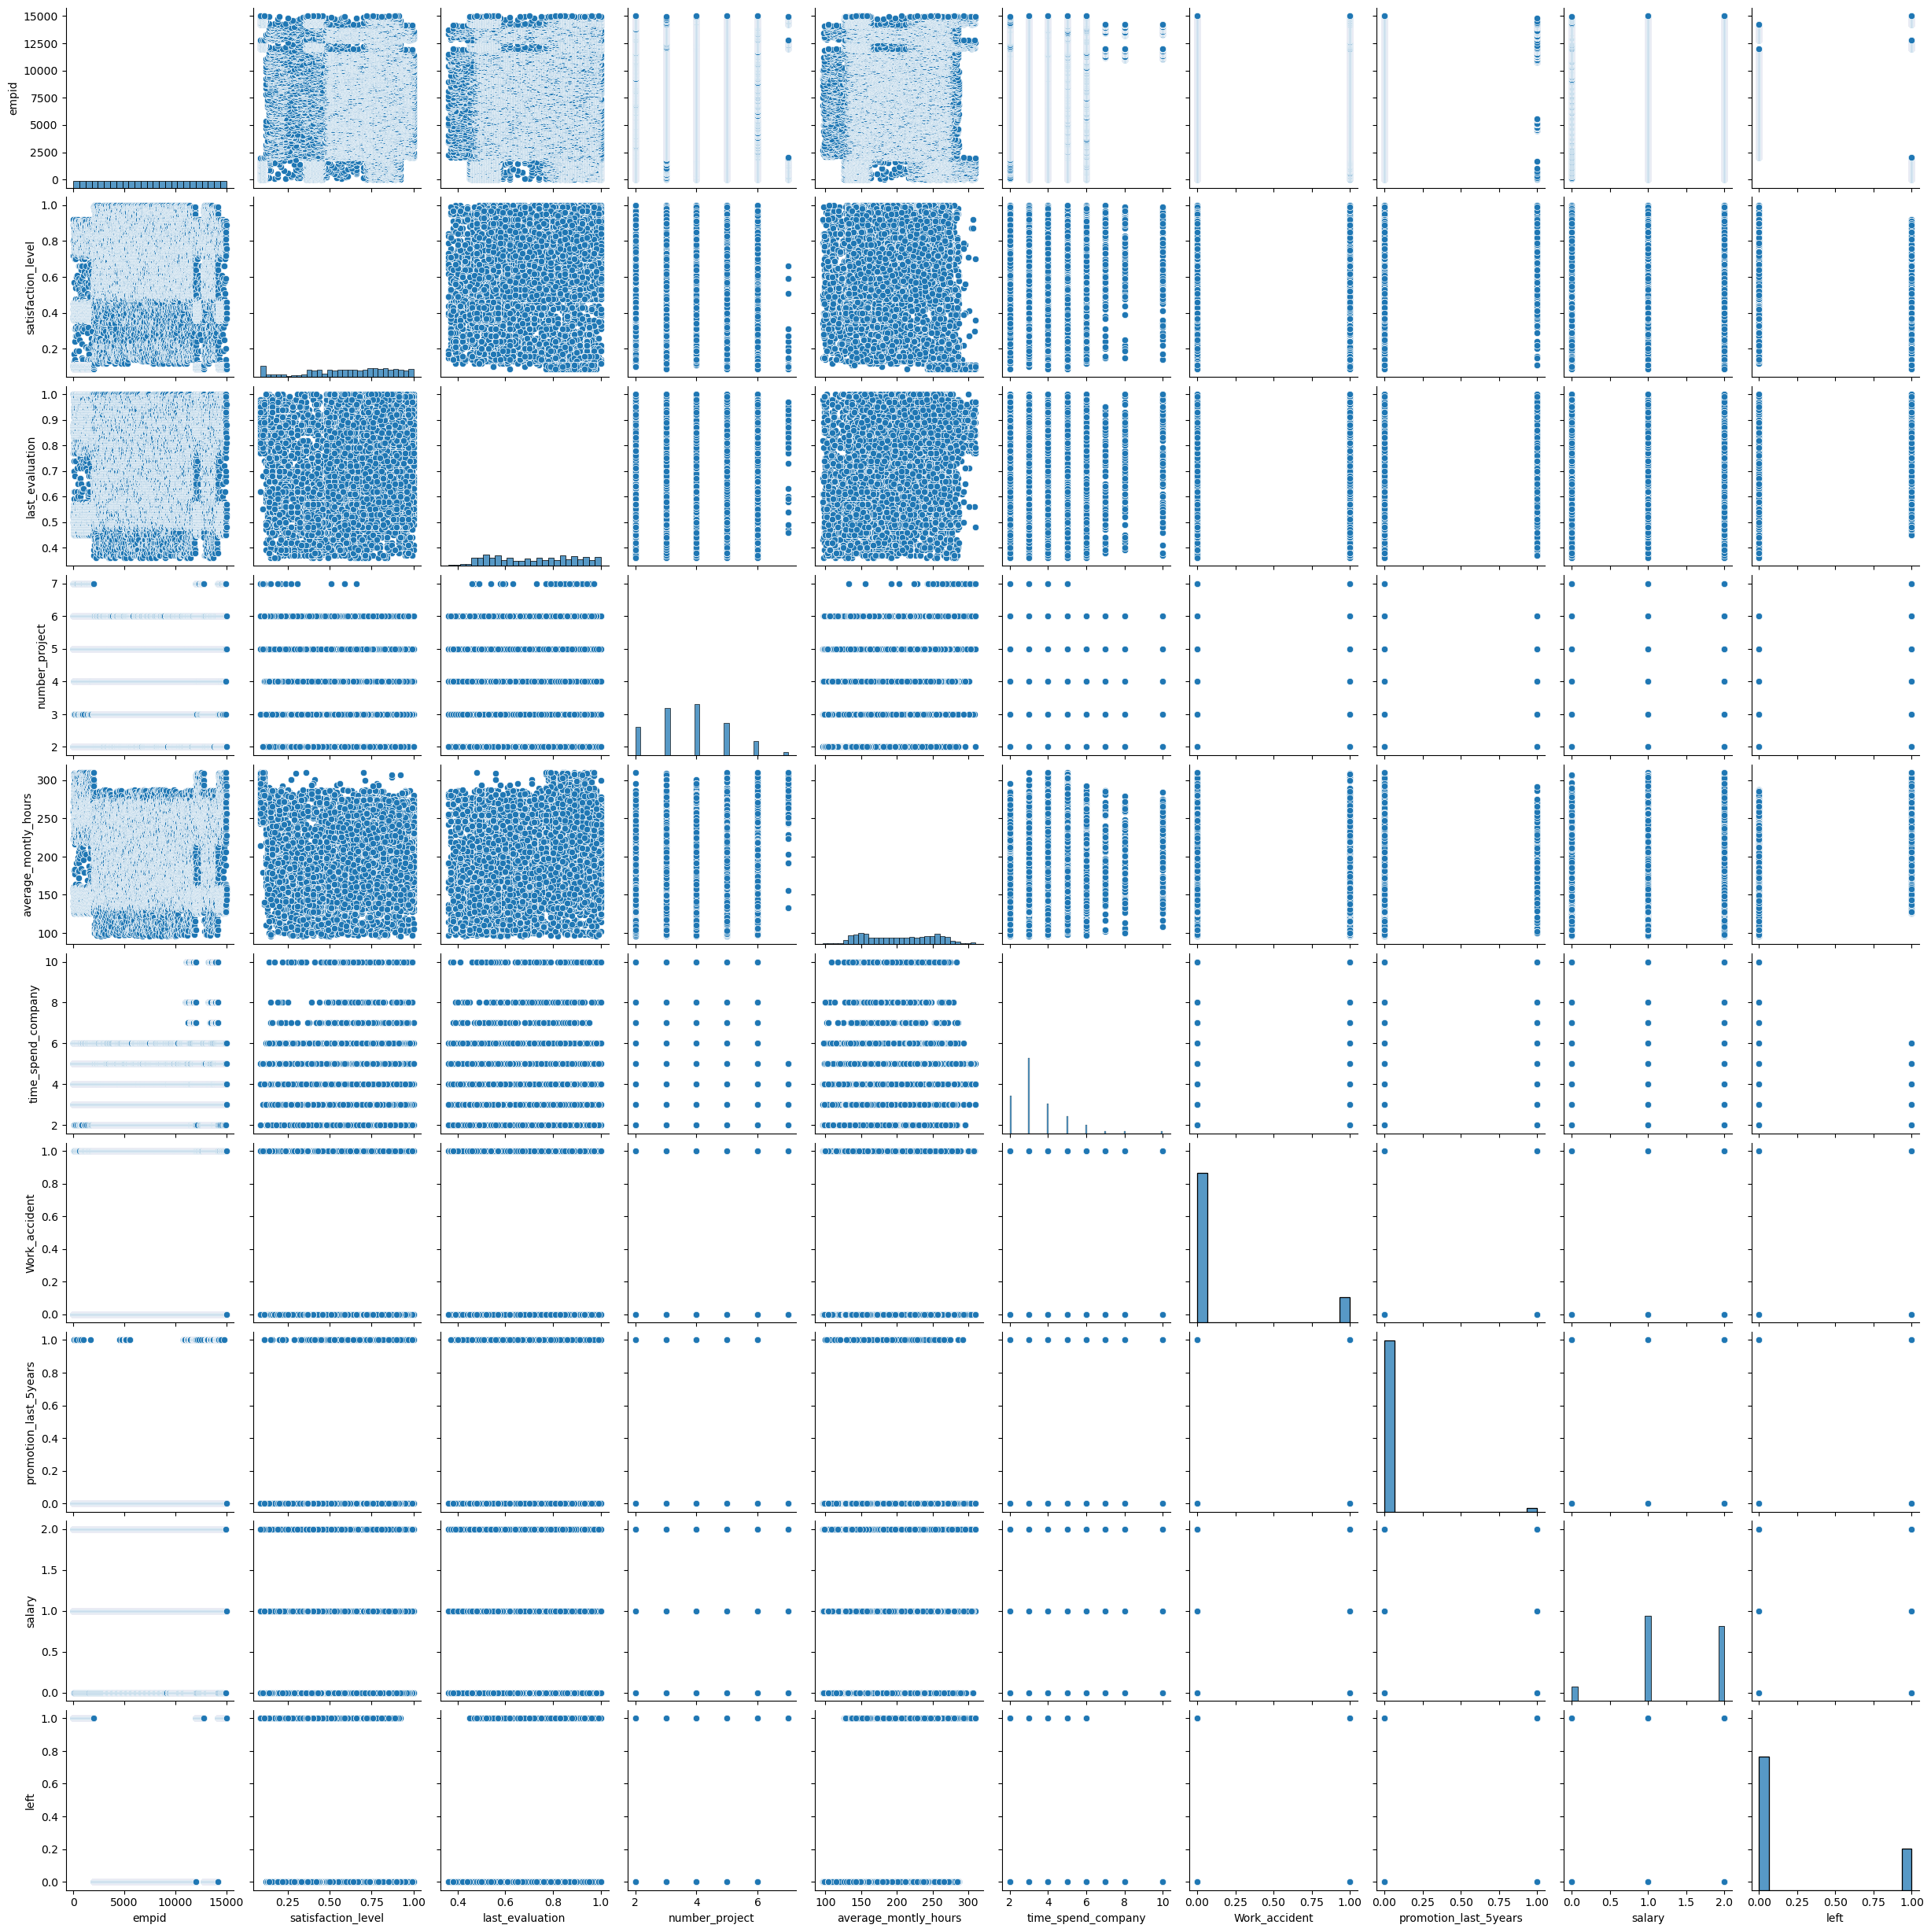

In [27]:
# Pair Plot dataset
plt.figure(figsize=(10,6))
sns.pairplot(data)

Feature Engineering

In [28]:
# Copy the data
data_1 = data.copy()

In [29]:
# Drop the variables
data_1.drop(['empid'], axis=1, inplace=True)

In [30]:
data_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [31]:
data_1['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [32]:
data_1['satisfaction_level'].fillna(data_1['satisfaction_level'].mean(), inplace=True)

/var/folders/r5/_bzgrbtj6tg33lk21qcyg0l80000gn/T/ipykernel_9839/4054725611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_1['satisfaction_level'].fillna(data_1['satisfaction_level'].mean(), inplace=True)


In [33]:
data_1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [34]:
#Handle Categorical Feature salary using dummies
data_1['salary'].unique()

array([1, 2, 0])

In [35]:
salary_dummies = pd.get_dummies(data_1['salary'], prefix='salary', drop_first=True)

In [36]:
salary_dummies

,salary_1,salary_2
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [37]:
data_1 = pd.concat([data_1, salary_dummies], axis=1)

In [38]:
data_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,salary_1,salary_2
0,0.38,0.53,2,157,3,0,0,1,1,True,False
1,0.80,0.86,5,262,6,0,0,2,1,False,True
2,0.11,0.88,7,272,4,0,0,2,1,False,True
3,0.72,0.87,5,223,5,0,0,1,1,True,False
4,0.37,0.52,2,159,3,0,0,1,1,True,False


In [39]:
# Drop the salary column
data_1.drop(['salary'], axis=1, inplace=True)

In [40]:
# Split dataset into features and label data
x = data_1.drop(['left'], axis=1)
y = data_1['left']

In [41]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [43]:
# Length of the training and testing data
len(x_train), len(x_test), len(y_train), len(y_test)

(11999, 3000, 11999, 3000)

Model Selection

In [44]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [45]:
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
    model_selection.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [46]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9519127414200362,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': None,
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9903324996526331,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

Model Building

In [47]:
# As pe the results, XGBClassifier has the best score and best parameters. So, we will use XGBClassifier for the prediction.
model_xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=3, n_estimators=200)

In [48]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
model_xgb.score(x_train, y_train)

0.9933327777314777

In [50]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_1,salary_2
6723,0.65,0.96,5,226,2,1,0,False,True
6473,0.88,0.80,3,166,2,0,0,True,False
4679,0.69,0.98,3,214,2,0,0,True,False
862,0.41,0.47,2,154,3,0,0,True,False
7286,0.87,0.76,5,254,2,1,0,True,False


In [51]:
x_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_1,salary_2
6723,0.65,0.96,5,226,2,1,0,False,True


In [52]:
model_xgb.predict(x_test[:1])

array([0])

In [53]:
data_1.loc[6723]

satisfaction_level        0.65
last_evaluation           0.96
number_project               5
average_montly_hours       226
time_spend_company           2
Work_accident                1
promotion_last_5years        0
left                         0
salary_1                 False
salary_2                  True
Name: 6723, dtype: object

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, model_xgb.predict(x_test))
cm

array([[2273,   21],
       [  32,  674]])

In [55]:
from sklearn.metrics import accuracy_score, classification_report

# Random Forest Evaluation
rf_predictions = model_xgb.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# XGBoost Evaluation
xgb_predictions = model_xgb.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))


Random Forest Accuracy: 0.9823333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.95      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000

XGBoost Accuracy: 0.9823333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.95      0.96       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



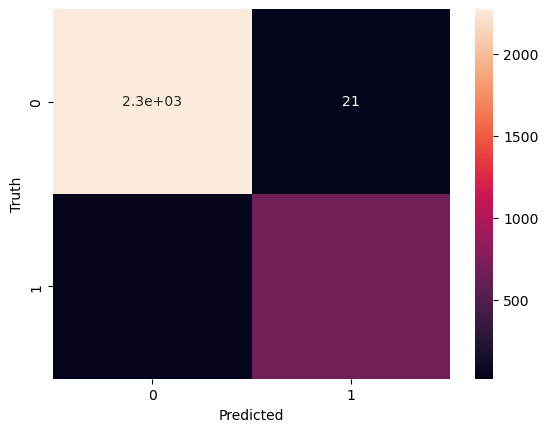

In [56]:
# plot the graph
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [57]:
import joblib

# Save the XGBooster model
joblib.dump(model_xgb, 'models/rf_churn_model.pkl')

['models/rf_churn_model.pkl']